## 1.Data Processing 

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Import Datasets
pd.set_option('display.float',lambda x:'%.3f'%x)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_Id = test['Id']

In [3]:
train.shape

(2000, 36)

In [4]:
test.shape

(2000, 35)

In [5]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html
train_price = train['price']
train_test = pd.concat([train.drop(['price'],axis = 1),test], axis = 0)

In [6]:
train_test

,Id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2000,within an hour,1.000,1.000,t,5,f,-33.919,151.242,Boutique hotel,...,10.000,9.000,10.000,10.000,10.000,t,flexible,f,f,0.230
1,2001,NaN,nan,0.830,t,1,f,-33.698,151.291,Guest suite,...,10.000,10.000,10.000,10.000,10.000,t,moderate,f,f,0.830
2,2002,within an hour,0.910,0.980,f,8,f,-33.847,151.073,Apartment,...,9.000,10.000,10.000,10.000,9.000,f,strict_14_with_grace_period,f,f,6.900
3,2003,within an hour,0.990,0.970,f,260,f,-33.870,151.195,Apartment,...,10.000,10.000,10.000,10.000,10.000,t,strict_14_with_grace_period,f,f,1.320
4,2004,within a day,1.000,nan,f,1,f,-33.908,151.212,Apartment,...,nan,nan,nan,nan,nan,f,moderate,f,f,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,NaN,nan,nan,f,1,t,-33.909,151.250,House,...,9.000,10.000,10.000,10.000,9.000,f,moderate,f,f,0.060
1996,1996,NaN,nan,nan,f,2,t,-33.787,151.284,Apartment,...,nan,nan,nan,nan,nan,f,flexible,f,f,nan
1997,1997,a few days or more,0.000,1.000,f,0,f,-33.904,151.258,Apartment,...,nan,nan,nan,nan,nan,t,flexible,f,f,0.190
1998,1998,a few days or more,0.000,0.670,f,0,f,-33.869,151.207,Apartment,...,10.000,10.000,10.000,10.000,10.000,f,flexible,f,f,0.400


### handling missing values

In [7]:
# check missing values
train_test.isnull( ).sum( ).sort_values(ascending = False)

host_response_time                  1911
host_response_rate                  1911
host_acceptance_rate                1431
security_deposit                    1377
cleaning_fee                        1024
review_scores_value                  980
review_scores_accuracy               980
review_scores_location               979
review_scores_checkin                978
review_scores_communication          976
review_scores_cleanliness            976
review_scores_rating                 975
reviews_per_month                    844
beds                                  15
bedrooms                               6
maximum_nights                         0
property_type                          0
require_guest_profile_picture          0
cancellation_policy                    0
instant_bookable                       0
host_is_superhost                      0
host_listings_count                    0
host_identity_verified                 0
latitude                               0
longitude       

In [8]:
# features with missing values
train_test.columns[train_test.isnull( ).sum( )>0]

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [9]:
train_test['host_response_time'].value_counts()

within an hour        1441
within a few hours     328
within a day           252
a few days or more      68
Name: host_response_time, dtype: int64

In [10]:
train_test['host_response_time']=train_test['host_response_time'].fillna('No_response')

In [11]:
train_test['host_response_rate'].mean()

0.943657252273817

In [12]:
train_test['host_response_rate']=train_test['host_response_rate'].fillna(train_test['host_response_rate'].mean())
train_test['host_acceptance_rate']=train_test['host_acceptance_rate'].fillna(train_test['host_acceptance_rate'].mean())

In [13]:
train['security_deposit']

0          nan
1        0.000
2        0.000
3      500.000
4      400.000
         ...  
1995       nan
1996   250.000
1997       nan
1998     0.000
1999   250.000
Name: security_deposit, Length: 2000, dtype: float64

In [14]:
train_test[['security_deposit','cleaning_fee']] = train_test[['security_deposit','cleaning_fee']].fillna(0)

In [15]:
review_features = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month']
train_test[review_features]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,100.000,10.000,10.000,9.000,10.000,10.000,10.000,0.230
1,100.000,10.000,10.000,10.000,10.000,10.000,10.000,0.830
2,92.000,9.000,9.000,10.000,10.000,10.000,9.000,6.900
3,97.000,10.000,10.000,10.000,10.000,10.000,10.000,1.320
4,nan,nan,nan,nan,nan,nan,nan,0.070
...,...,...,...,...,...,...,...,...
1995,100.000,9.000,9.000,10.000,10.000,10.000,9.000,0.060
1996,nan,nan,nan,nan,nan,nan,nan,nan
1997,nan,nan,nan,nan,nan,nan,nan,0.190
1998,100.000,10.000,10.000,10.000,10.000,10.000,10.000,0.400


In [16]:
train_test['reviews_per_month'] = train_test['reviews_per_month'].fillna(0)

review_features = ['review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

dict1 = {1:'C',2:'C',3:'C',4:'C',5:'C',6:'B',7:'B',8:'B',9:'A',10:'A',np.nan:'no_review'}
train_test[review_features] = train_test[review_features].replace(dict1)

In [17]:
train_test['review_scores_rating'].value_counts() 

100.000    979
98.000     194
93.000     193
96.000     192
80.000     184
97.000     157
95.000     156
90.000     152
99.000     127
94.000     114
92.000      80
91.000      78
87.000      73
88.000      44
60.000      44
85.000      35
89.000      35
86.000      25
70.000      23
84.000      22
83.000      18
40.000      14
82.000      13
20.000      11
73.000      10
76.000       8
78.000       8
81.000       5
75.000       5
74.000       4
67.000       4
79.000       3
77.000       3
72.000       2
30.000       2
50.000       2
53.000       2
71.000       2
69.000       1
63.000       1
Name: review_scores_rating, dtype: int64

In [18]:
def review(x):
    if np.isnan(x):
        return "no_review"
    elif x<65:
       return 'Bad'
    elif x<85:
       return 'Fine'
    else:
        return 'Good'
train_test['review_scores_rating']=train_test['review_scores_rating'].apply(review)
train_test['review_scores_rating'].value_counts()

Good         2634
no_review     975
Fine          315
Bad            76
Name: review_scores_rating, dtype: int64

In [19]:
train_test['reviews_per_month'].value_counts().describe()

count   483.000
mean      8.282
std      40.352
min       1.000
25%       1.000
50%       3.000
75%       6.000
max     844.000
Name: reviews_per_month, dtype: float64

In [20]:
def review(x):
    if x<1:
        return "No_reviews"
    elif x<8:
       return 'Fine'
    else:
        return 'Popular'
train_test['reviews_per_month']=train_test['reviews_per_month'].apply(review)
train_test['reviews_per_month'].value_counts()

No_reviews    2959
Fine          1031
Popular         10
Name: reviews_per_month, dtype: int64

In [21]:
room = ['bathrooms','bedrooms','beds','bed_type']
train_test[room]

,bathrooms,bedrooms,beds,bed_type
0,1.000,0.000,1.000,Real Bed
1,1.000,1.000,2.000,Real Bed
2,1.000,2.000,2.000,Real Bed
3,1.000,1.000,1.000,Real Bed
4,1.000,1.000,1.000,Real Bed
...,...,...,...,...
1995,2.000,4.000,7.000,Real Bed
1996,1.000,3.000,4.000,Real Bed
1997,1.000,1.000,1.000,Real Bed
1998,1.000,1.000,1.000,Real Bed


In [22]:
train_test[room][train_test['beds'].isnull()]

,bathrooms,bedrooms,beds,bed_type
74,1.000,0.000,nan,Real Bed
209,1.000,1.000,nan,Real Bed
617,1.000,1.000,nan,Real Bed
731,1.000,1.000,nan,Real Bed
920,1.000,1.000,nan,Real Bed
1040,1.000,nan,nan,Real Bed
1259,1.000,1.000,nan,Real Bed
1520,1.000,1.000,nan,Real Bed
1523,1.000,1.000,nan,Real Bed
1656,1.500,1.000,nan,Real Bed


In [23]:
room = ['bathrooms','bedrooms','beds','bed_type']
train_test.loc[train_test['beds'].isnull(),'beds']= train_test.loc[train_test['beds'].isnull(),'bathrooms']
train_test.loc[train_test['bedrooms'].isnull(),'bedrooms']= train_test.loc[train_test['bedrooms'].isnull(),'bathrooms']

In [24]:
train_test = train_test.drop(columns = 'Id')

In [25]:
train_test.isnull().sum()

host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_score

In [26]:
train_test

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,within an hour,1.000,1.000,t,5,f,-33.919,151.242,Boutique hotel,Hotel room,...,A,A,A,A,A,t,flexible,f,f,No_reviews
1,No_response,0.944,0.830,t,1,f,-33.698,151.291,Guest suite,Entire home/apt,...,A,A,A,A,A,t,moderate,f,f,No_reviews
2,within an hour,0.910,0.980,f,8,f,-33.847,151.073,Apartment,Entire home/apt,...,A,A,A,A,A,f,strict_14_with_grace_period,f,f,Fine
3,within an hour,0.990,0.970,f,260,f,-33.870,151.195,Apartment,Entire home/apt,...,A,A,A,A,A,t,strict_14_with_grace_period,f,f,Fine
4,within a day,1.000,0.824,f,1,f,-33.908,151.212,Apartment,Private room,...,no_review,no_review,no_review,no_review,no_review,f,moderate,f,f,No_reviews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,No_response,0.944,0.824,f,1,t,-33.909,151.250,House,Entire home/apt,...,A,A,A,A,A,f,moderate,f,f,No_reviews
1996,No_response,0.944,0.824,f,2,t,-33.787,151.284,Apartment,Entire home/apt,...,no_review,no_review,no_review,no_review,no_review,f,flexible,f,f,No_reviews
1997,a few days or more,0.000,1.000,f,0,f,-33.904,151.258,Apartment,Entire home/apt,...,no_review,no_review,no_review,no_review,no_review,t,flexible,f,f,No_reviews
1998,a few days or more,0.000,0.670,f,0,f,-33.869,151.207,Apartment,Private room,...,A,A,A,A,A,f,flexible,f,f,No_reviews


In [27]:
train = train_test.iloc[0:2000]
test = train_test.iloc[2000:]
train['price'] = train_price

In [28]:
train.shape

(2000, 35)

In [29]:
test.shape

(2000, 34)

## 2.EDA and Feature Engineering

In [30]:
#Survey data type
train.dtypes

host_response_time                   object
host_response_rate                  float64
host_acceptance_rate                float64
host_is_superhost                    object
host_listings_count                   int64
host_identity_verified               object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
security_deposit                    float64
cleaning_fee                        float64
guests_included                       int64
extra_people                          int64
minimum_nights                        int64
maximum_nights                        int64
number_of_reviews                     int64
review_scores_rating            

In [31]:
category_f=train.columns[train.dtypes=='object'] 
numerical_f=train.columns[train.dtypes!='object']

### Category feature

#### 1.Ordinal encoding

In [32]:
print(train_test['host_response_time'].value_counts())
print(train_test['cancellation_policy'].value_counts())

No_response           1911
within an hour        1441
within a few hours     328
within a day           252
a few days or more      68
Name: host_response_time, dtype: int64
strict_14_with_grace_period    1675
flexible                       1332
moderate                        978
super_strict_30                   8
super_strict_60                   7
Name: cancellation_policy, dtype: int64


In [33]:
train['host_response_time']=train['host_response_time'].map({'No_response':0,
                                                                       'a few days or more':1,
                                                                       'within a day':2,
                                                                       'within a few hours':3,
                                                                       'within an hour':4})
train['cancellation_policy']=train['cancellation_policy'].map({'super_strict_60':0,
                                                                      'super_strict_30':1,
                                                                      'moderate':2,
                                                                       'flexible':3,
                                                                       'strict_14_with_grace_period':4})

In [34]:
test['host_response_time']=test['host_response_time'].map({'No_response':0,
                                                                       'a few days or more':1,
                                                                       'within a day':2,
                                                                       'within a few hours':3,
                                                                       'within an hour':4})
test['cancellation_policy']=test['cancellation_policy'].map({'super_strict_60':0,
                                                                      'super_strict_30':1,
                                                                      'moderate':2,
                                                                       'flexible':3,
                                                                       'strict_14_with_grace_period':4})

#### 2. One-hot encoding

In [35]:
train['host_is_superhost']=train['host_is_superhost'].map({'f':0,'t':1})
for i in['host_identity_verified','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']:
  train[i]=train[i].map({'f':0,'t':1})

In [36]:
test['host_is_superhost']=test['host_is_superhost'].map({'f':0,'t':1})
for i in['host_identity_verified','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']:
  test[i]=test[i].map({'f':0,'t':1})

#### 3. Reduce category

In [37]:
#See how many types of each variable
train[category_f].nunique()

host_response_time                   5
host_is_superhost                    2
host_identity_verified               2
property_type                       23
room_type                            4
bed_type                             4
review_scores_rating                 4
review_scores_accuracy               4
review_scores_cleanliness            4
review_scores_checkin                4
review_scores_communication          4
review_scores_location               4
review_scores_value                  4
instant_bookable                     2
cancellation_policy                  5
require_guest_profile_picture        2
require_guest_phone_verification     2
reviews_per_month                    3
dtype: int64

### 3.1 property_type

In [38]:
train['property_type'].value_counts()

Apartment             1327
House                  423
Townhouse               78
Condominium             34
Guest suite             34
Guesthouse              28
Villa                   12
Boutique hotel          10
Serviced apartment       9
Loft                     9
Cottage                  7
Bungalow                 6
Cabin                    6
Hostel                   3
Tiny house               2
Bed and breakfast        2
Hotel                    2
Boat                     2
Other                    2
Camper/RV                1
Farm stay                1
Treehouse                1
Tent                     1
Name: property_type, dtype: int64

In [39]:
#Too many variables, select variables with strong predictive ability
property_count=train['property_type'].value_counts()
property_count.index[property_count>=9]

Index(['Apartment', 'House', 'Townhouse', 'Condominium', 'Guest suite',
       'Guesthouse', 'Villa', 'Boutique hotel', 'Serviced apartment', 'Loft'],
      dtype='object')

In [40]:
#Reintegrate variables
property_count=train['property_type'].value_counts()

for i in property_count.index:
    if property_count[i] < 9:
       train.loc[train['property_type']==i,'property_type']='other'

train['property_type'].value_counts()

Apartment             1327
House                  423
Townhouse               78
other                   36
Guest suite             34
Condominium             34
Guesthouse              28
Villa                   12
Boutique hotel          10
Serviced apartment       9
Loft                     9
Name: property_type, dtype: int64

In [41]:
test['property_type'].value_counts()

Apartment                 1279
House                      442
Townhouse                   94
Condominium                 42
Guest suite                 31
Guesthouse                  24
Loft                        21
Boutique hotel              12
Villa                       12
Serviced apartment          10
Hostel                       7
Cottage                      7
Bungalow                     5
Bed and breakfast            3
Hotel                        3
Other                        2
Tent                         1
Camper/RV                    1
Yurt                         1
Casa particular (Cuba)       1
Boat                         1
Tiny house                   1
Name: property_type, dtype: int64

In [42]:
property_count1=test['property_type'].value_counts()

for i in property_count1.index:
    if property_count1[i] < 10:
       test.loc[test['property_type']==i,'property_type']='other'

test['property_type'].value_counts()

Apartment             1279
House                  442
Townhouse               94
Condominium             42
other                   33
Guest suite             31
Guesthouse              24
Loft                    21
Boutique hotel          12
Villa                   12
Serviced apartment      10
Name: property_type, dtype: int64

### 3.2 Room type

In [43]:
train['room_type'].value_counts()

Entire home/apt    1284
Private room        677
Shared room          23
Hotel room           16
Name: room_type, dtype: int64

In [44]:
room_type=train['room_type'].value_counts()

for i in room_type.index:
    if room_type[i] < 100:
       train.loc[train['room_type']==i,'room_type']='other'
train['room_type'].value_counts()

Entire home/apt    1284
Private room        677
other                39
Name: room_type, dtype: int64

In [45]:
room_type1=test['room_type'].value_counts()

for i in room_type1.index:
    if room_type1[i] < 100:
       test.loc[test['room_type']==i,'room_type']='other'
test['room_type'].value_counts()

Entire home/apt    1284
Private room        670
other                46
Name: room_type, dtype: int64

### 3.3 Bed type

In [46]:
train['bed_type'].value_counts()

Real Bed         1985
Pull-out Sofa      10
Airbed              3
Futon               2
Name: bed_type, dtype: int64

In [47]:
bed_type=train['bed_type'].value_counts()

for i in bed_type.index:
    if bed_type[i] < 100:
       train.loc[train['bed_type']==i,'bed_type']='other'
train['bed_type'].value_counts()

Real Bed    1985
other         15
Name: bed_type, dtype: int64

In [48]:
bed_type1=test['bed_type'].value_counts()

for i in bed_type1.index:
    if bed_type1[i] < 100:
       test.loc[test['bed_type']==i,'bed_type']='other'
test['bed_type'].value_counts()

Real Bed    1990
other         10
Name: bed_type, dtype: int64

### Check the processing (get dummies)

In [49]:
dm_train=pd.get_dummies(train,drop_first=True)
dm_test=pd.get_dummies(test,drop_first=True) 
dm_train

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,review_scores_communication_C,review_scores_communication_no_review,review_scores_location_B,review_scores_location_C,review_scores_location_no_review,review_scores_value_B,review_scores_value_C,review_scores_value_no_review,reviews_per_month_No_reviews,reviews_per_month_Popular
0,4,1.000,1.000,1,5,0,-33.919,151.242,2,1.000,...,0,0,0,0,0,0,0,0,1,0
1,0,0.944,0.830,1,1,0,-33.698,151.291,4,1.000,...,0,0,0,0,0,0,0,0,1,0
2,4,0.910,0.980,0,8,0,-33.847,151.073,4,1.000,...,0,0,0,0,0,0,0,0,0,0
3,4,0.990,0.970,0,260,0,-33.870,151.195,2,1.000,...,0,0,0,0,0,0,0,0,0,0
4,2,1.000,0.824,0,1,0,-33.908,151.212,1,1.000,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1.000,0.990,0,23,1,-33.881,151.217,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1996,4,1.000,0.950,0,9,0,-33.869,151.191,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1997,4,1.000,0.950,1,5,1,-33.886,151.200,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1998,2,0.800,0.500,0,3,1,-33.868,151.170,1,2.500,...,0,0,0,0,0,0,0,0,1,0


In [50]:
dm_train.shape

(2000, 60)

In [51]:
dm_test.shape

(2000, 59)

In [52]:
test_del=[]
for i in dm_test.columns:
    if i not in dm_train.columns:
        test_del.append(i)
test_del

[]

In [53]:
train_del=[]
for i in dm_train.columns:
    if i not in dm_test.columns:
      train_del.append(i)
train_del

['price']

### Numerical features

In [54]:
train[numerical_f]

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,price
0,1.000,1.000,5,-33.919,151.242,2,1.000,0.000,1.000,0.000,0.000,1,0,1,1125,3,199
1,0.944,0.830,1,-33.698,151.291,4,1.000,1.000,2.000,0.000,40.000,1,7,2,45,18,95
2,0.910,0.980,8,-33.847,151.073,4,1.000,2.000,2.000,0.000,90.000,4,30,1,1125,80,156
3,0.990,0.970,260,-33.870,151.195,2,1.000,1.000,1.000,500.000,250.000,2,0,2,1125,20,100
4,1.000,0.824,1,-33.908,151.212,1,1.000,1.000,1.000,400.000,50.000,1,0,3,3,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.000,0.990,23,-33.881,151.217,2,1.000,1.000,1.000,0.000,20.000,1,12,1,1125,207,45
1996,1.000,0.950,9,-33.869,151.191,2,1.000,1.000,1.000,250.000,35.000,1,0,1,30,137,108
1997,1.000,0.950,5,-33.886,151.200,2,1.000,1.000,1.000,0.000,100.000,1,0,4,1125,23,120
1998,0.800,0.500,3,-33.868,151.170,1,2.500,1.000,1.000,0.000,0.000,1,30,2,1125,13,90


In [55]:
numerical=[]
dummy=[]
for i in dm_train.columns:
    if dm_train[i].value_counts().shape[0]>2:
        numerical.append(i)
    else:
       dummy.append(i)
print('numerical:{}'.format(numerical))
print('')
print('dummy:{}'.format(dummy))

numerical:['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'cancellation_policy', 'price']

dummy:['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'property_type_Boutique hotel', 'property_type_Condominium', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_House', 'property_type_Loft', 'property_type_Serviced apartment', 'property_type_Townhouse', 'property_type_Villa', 'property_type_other', 'room_type_Private room', 'room_type_other', 'bed_type_other', 'review_scores_rating_Fine', 'review_scores_rating_Good', 'review_scores_rating_no_review', 'review_scores_accuracy_B', 'review_scores_accuracy_C', 'review_scores_accuracy_no_review', '

## EDA

### 1.Statistics

In [56]:
describe=dm_train.describe()
describe.loc['skew',:]=dm_train.skew()
describe.loc['Kurt',:]=dm_train.kurt()
describe[numerical]

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,price
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,1.873,0.946,0.827,6.822,-33.868,151.214,3.153,1.274,1.467,1.826,214.798,62.108,1.581,11.688,4.928,674.477,19.114,3.160,158.700
std,1.855,0.121,0.224,22.353,0.066,0.059,1.865,0.629,0.883,1.257,413.272,69.210,1.263,24.153,13.977,529.073,42.223,0.814,105.118
min,0.000,0.000,0.000,0.000,-34.080,151.040,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,27.000
25%,0.000,0.944,0.824,1.000,-33.899,151.186,2.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,30.000,1.000,2.000,81.000
50%,2.000,0.944,0.824,1.000,-33.883,151.216,2.000,1.000,1.000,1.000,0.000,50.000,1.000,0.000,2.000,1125.000,3.000,3.000,129.000
75%,4.000,1.000,0.990,2.000,-33.847,151.259,4.000,1.500,2.000,2.000,300.000,100.000,2.000,20.000,5.000,1125.000,17.000,4.000,200.000
max,4.000,1.000,1.000,260.000,-33.590,151.340,16.000,18.000,6.000,16.000,7021.000,500.000,16.000,400.000,365.000,1125.000,598.000,4.000,550.000
skew,0.095,-5.719,-2.337,6.608,1.210,-0.723,1.427,10.388,1.271,2.283,5.718,1.679,3.066,6.493,13.852,-0.347,4.780,-0.401,1.433
Kurt,-1.860,36.929,5.634,53.161,3.157,0.219,2.603,250.793,2.099,11.569,62.198,4.142,14.263,79.681,273.189,-1.849,34.309,-0.994,1.911


### 2.Visual

<function matplotlib.pyplot.show(close=None, block=None)>

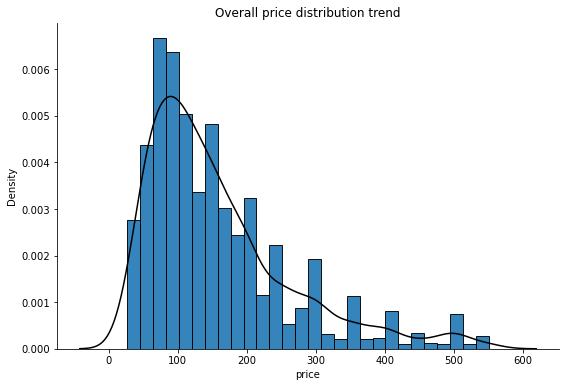

In [57]:
from statlearning import plot_dist
plot_dist(dm_train['price'])
plt.title('Overall price distribution trend')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

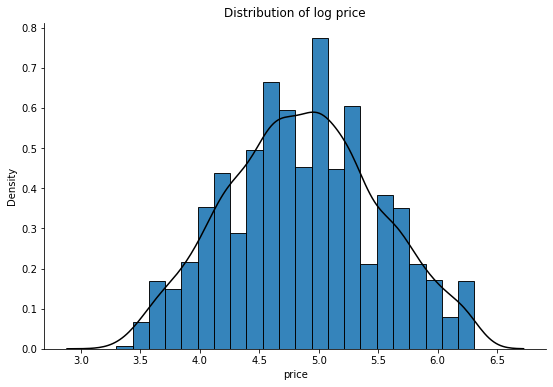

In [58]:
log_y_train=np.log(dm_train['price'])
from statlearning import plot_dist
plot_dist(log_y_train)
plt.title('Distribution of log price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

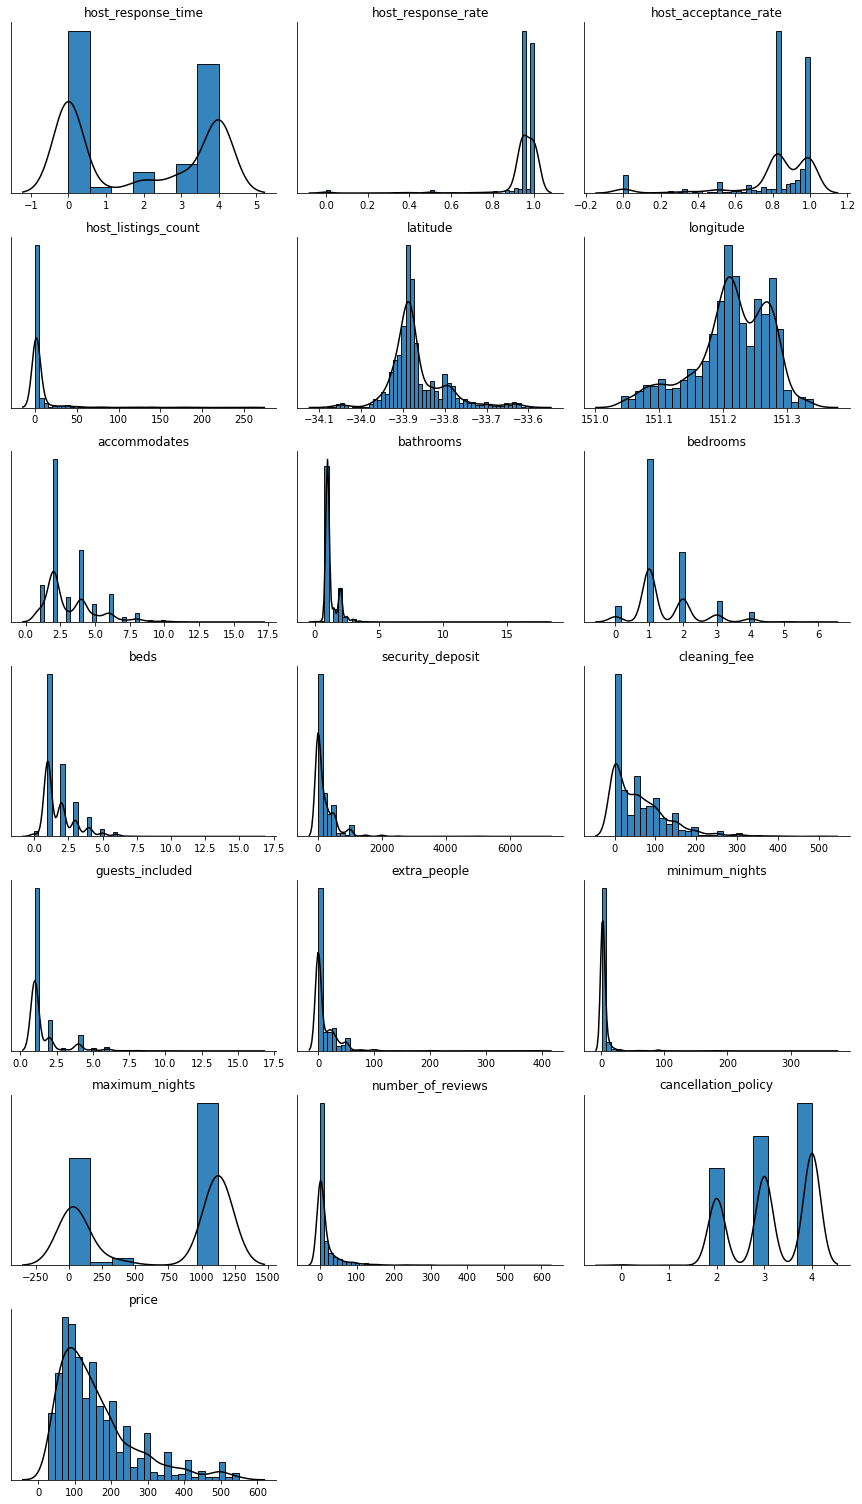

In [59]:
from statlearning import plot_dists
plot_dists(dm_train[numerical])
plt.show

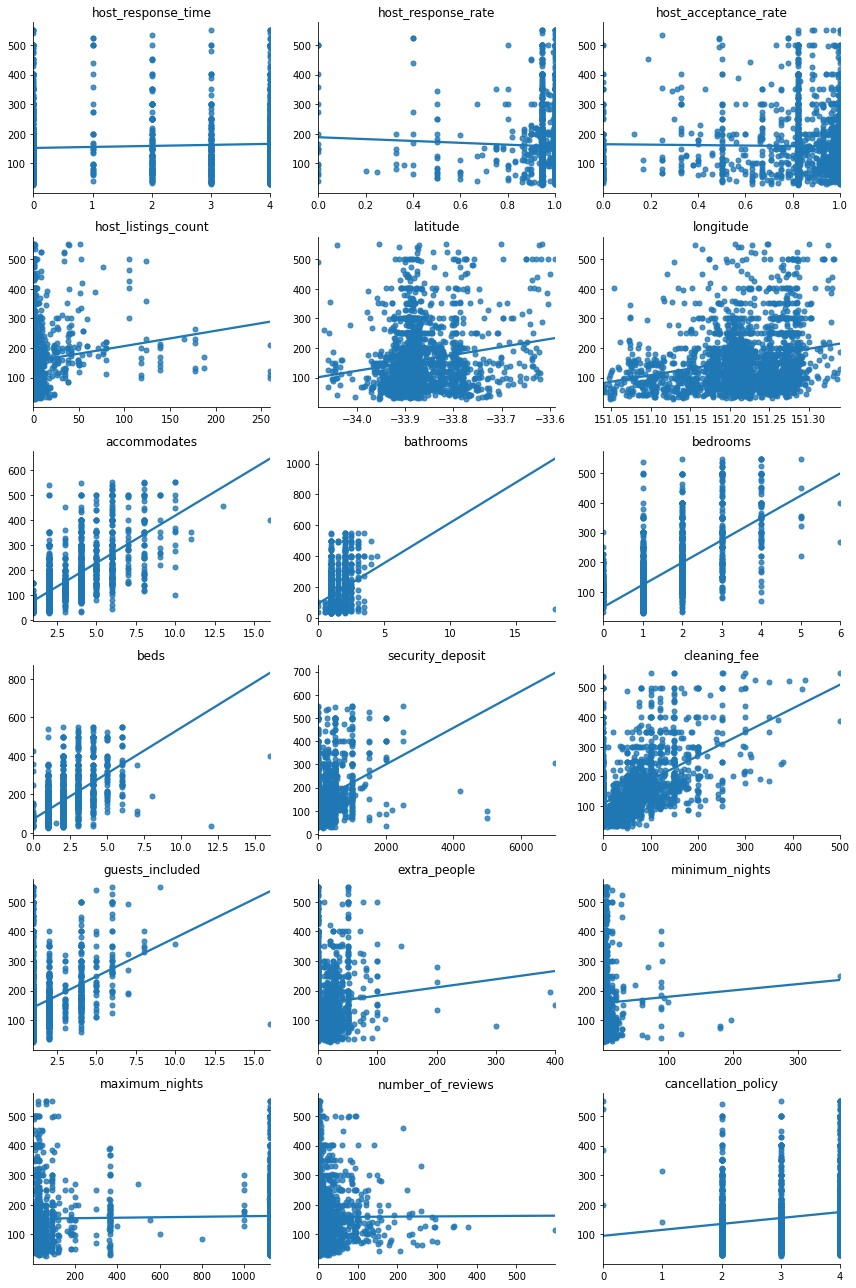

In [60]:
from statlearning import plot_regressions
reg_numerical=numerical.copy()
reg_numerical.remove('price')
plot_regressions(dm_train[reg_numerical],dm_train['price'])
plt.show()

### Box plot

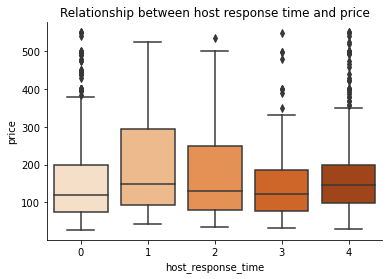

In [61]:
sns.boxplot(x=dm_train['host_response_time'],y=dm_train.loc[:,'price'],palette='Oranges')
sns.despine()
plt.title('Relationship between host response time and price')
plt.show()

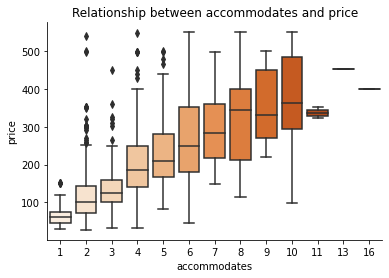

In [62]:
parts=dm_train['accommodates']<=20
sns.boxplot(x=dm_train.loc[parts,'accommodates'],y=dm_train.loc[parts,'price'],palette='Oranges')
plt.title('Relationship between accommodates and price')
sns.despine()
plt.show()

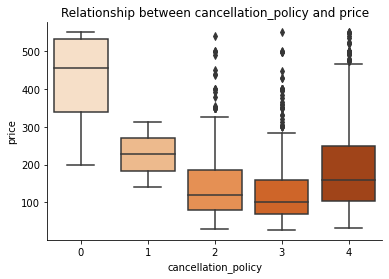

In [63]:
sns.boxplot(x=dm_train['cancellation_policy'],y=dm_train.loc[:,'price'],palette='Oranges')
sns.despine()
plt.title('Relationship between cancellation_policy and price')
plt.show()

### Heatmap

In [64]:
corr=dm_train.corr()['price'].sort_values()
corr

room_type_Private room                  -0.556
room_type_other                         -0.088
instant_bookable                        -0.066
review_scores_cleanliness_B             -0.066
review_scores_cleanliness_C             -0.058
property_type_Guesthouse                -0.049
bed_type_other                          -0.048
review_scores_accuracy_no_review        -0.038
review_scores_value_no_review           -0.038
review_scores_checkin_no_review         -0.038
review_scores_location_no_review        -0.038
review_scores_communication_B           -0.037
host_response_rate                      -0.036
review_scores_communication_no_review   -0.036
review_scores_rating_no_review          -0.036
review_scores_cleanliness_no_review     -0.036
review_scores_rating_Fine               -0.031
review_scores_accuracy_C                -0.030
review_scores_checkin_C                 -0.025
review_scores_location_B                -0.025
property_type_Villa                     -0.023
require_guest

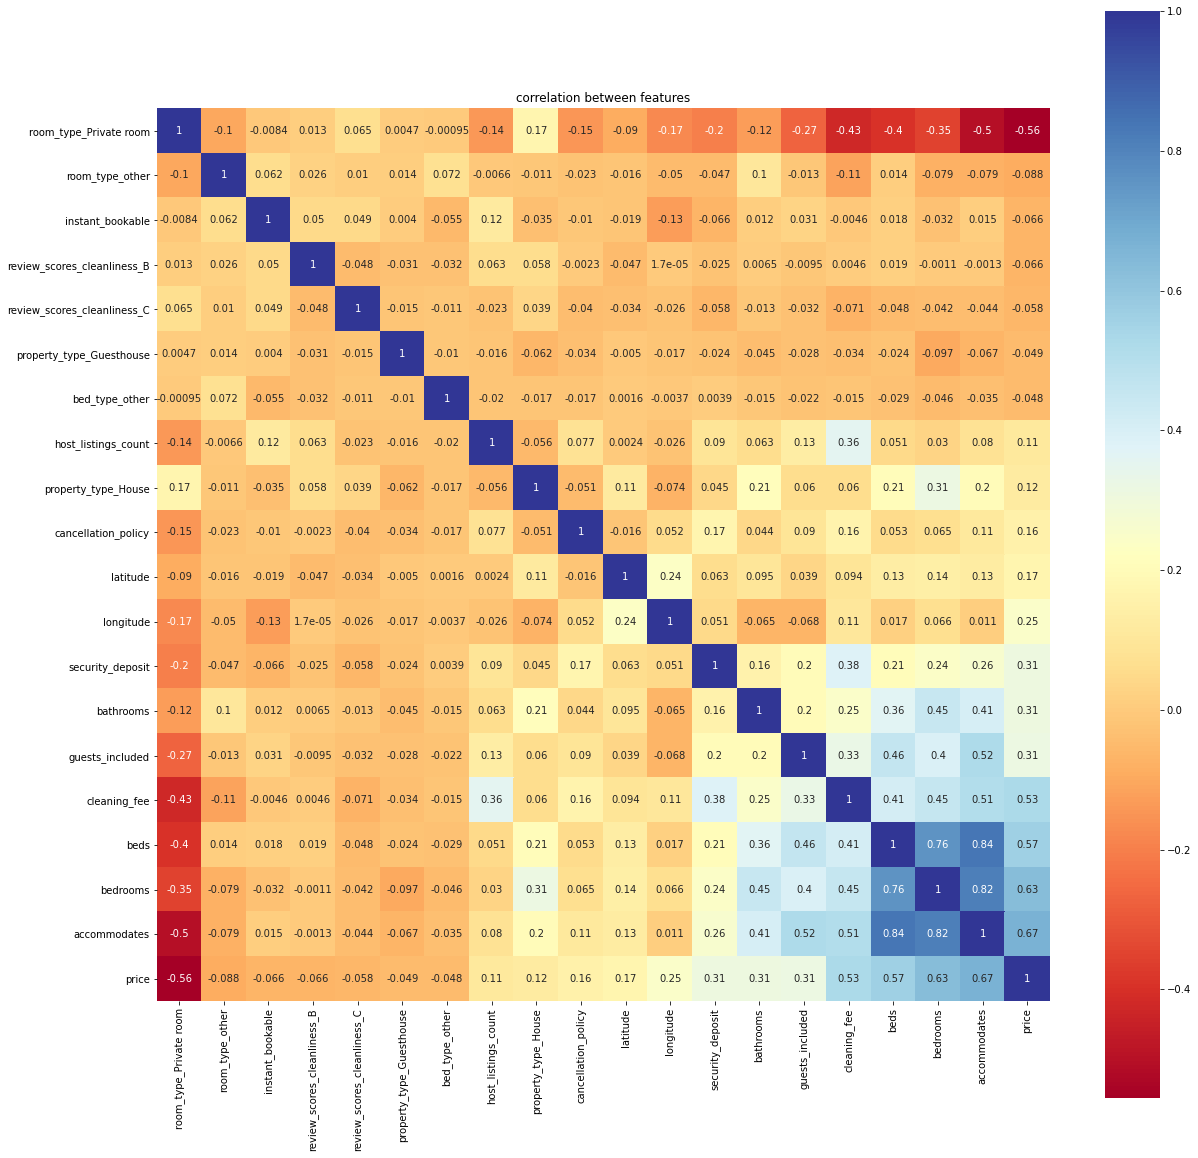

In [65]:
#choose the most relevant
corr_dm_train=dm_train[corr.loc[(corr>0.1)|(corr<-0.04)].index]
plt.subplots(figsize=(20,20))
sns.heatmap(corr_dm_train.corr(),square=True,annot=True,cmap='RdYlBu')
plt.title('correlation between features')
plt.show()

 ### Region and Price

<function matplotlib.pyplot.show(close=None, block=None)>

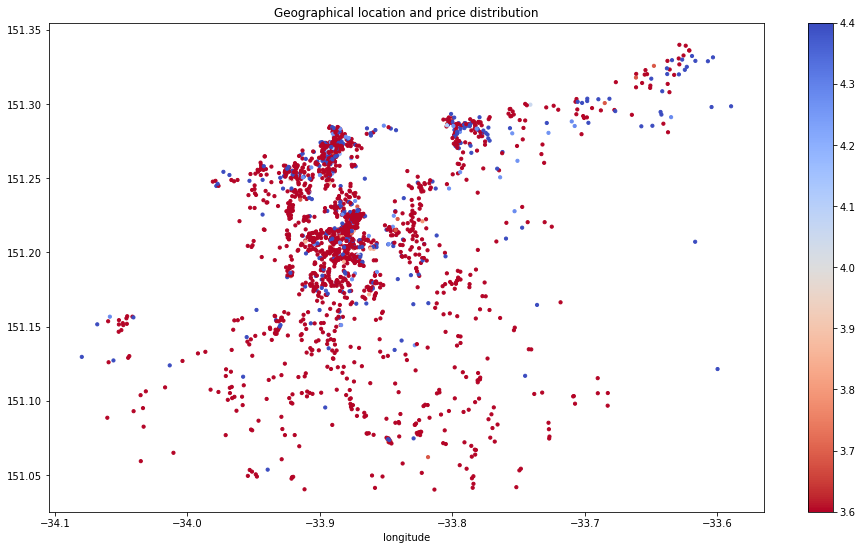

In [66]:
plt.figure(figsize=(16,9))
price=train['price']
c=10*(price-price.min())/(price.max()-price.min())
RP=plt.scatter(x=train['latitude'],y=train['longitude'],
               c=c,vmin=4,vmax=4,s=10,cmap='coolwarm_r')
plt.colorbar(RP)
plt.title('Geographical location and price distribution')
plt.xlabel('latitude')
plt.xlabel('longitude')
plt.show

In [67]:
train_clean=dm_train.drop('price',axis=1) 
test_clean=dm_test

In [68]:
train_clean.shape

(2000, 59)

In [69]:
test_clean.shape

(2000, 59)

# 3.Linear regression

In [70]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [71]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [72]:
train_price

0       199
1        95
2       156
3       100
4       100
       ... 
1995     45
1996    108
1997    120
1998     90
1999     94
Name: price, Length: 2000, dtype: int64

In [73]:
train_clean

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,review_scores_communication_C,review_scores_communication_no_review,review_scores_location_B,review_scores_location_C,review_scores_location_no_review,review_scores_value_B,review_scores_value_C,review_scores_value_no_review,reviews_per_month_No_reviews,reviews_per_month_Popular
0,4,1.000,1.000,1,5,0,-33.919,151.242,2,1.000,...,0,0,0,0,0,0,0,0,1,0
1,0,0.944,0.830,1,1,0,-33.698,151.291,4,1.000,...,0,0,0,0,0,0,0,0,1,0
2,4,0.910,0.980,0,8,0,-33.847,151.073,4,1.000,...,0,0,0,0,0,0,0,0,0,0
3,4,0.990,0.970,0,260,0,-33.870,151.195,2,1.000,...,0,0,0,0,0,0,0,0,0,0
4,2,1.000,0.824,0,1,0,-33.908,151.212,1,1.000,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1.000,0.990,0,23,1,-33.881,151.217,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1996,4,1.000,0.950,0,9,0,-33.869,151.191,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1997,4,1.000,0.950,1,5,1,-33.886,151.200,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1998,2,0.800,0.500,0,3,1,-33.868,151.170,1,2.500,...,0,0,0,0,0,0,0,0,1,0


In [74]:
test_clean

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,review_scores_communication_C,review_scores_communication_no_review,review_scores_location_B,review_scores_location_C,review_scores_location_no_review,review_scores_value_B,review_scores_value_C,review_scores_value_no_review,reviews_per_month_No_reviews,reviews_per_month_Popular
0,3,1.000,0.570,0,1,1,-33.777,151.262,1,1.000,...,0,0,0,0,0,0,0,0,1,0
1,1,0.000,1.000,0,1,1,-33.796,151.156,4,1.000,...,0,0,0,0,0,0,0,0,1,0
2,0,0.944,1.000,0,1,0,-33.875,151.225,2,1.000,...,0,0,0,0,0,0,0,0,0,0
3,0,0.944,0.824,0,2,0,-33.898,151.178,2,1.000,...,0,0,0,0,0,0,0,0,1,0
4,2,1.000,0.850,1,1,0,-34.045,151.146,2,1.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0.944,0.824,0,1,1,-33.909,151.250,7,2.000,...,0,0,0,0,0,0,0,0,1,0
1996,0,0.944,0.824,0,2,1,-33.787,151.284,5,1.000,...,0,1,0,0,1,0,0,1,1,0
1997,1,0.000,1.000,0,0,0,-33.904,151.258,2,1.000,...,0,1,0,0,1,0,0,1,1,0
1998,1,0.000,0.670,0,0,0,-33.869,151.207,1,1.000,...,0,0,0,0,0,0,0,0,1,0


In [75]:
y_train = np.log(train['price'])
print(y_train.shape)
y_train.head()

(2000,)


0   5.293
1   4.554
2   5.050
3   4.605
4   4.605
Name: price, dtype: float64

In [76]:
y_test = np.log(train['price'])
print(y_test.shape)
y_train.head()

(2000,)


0   5.293
1   4.554
2   5.050
3   4.605
4   4.605
Name: price, dtype: float64

In [77]:
X_train = train_clean
X_train

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,review_scores_communication_C,review_scores_communication_no_review,review_scores_location_B,review_scores_location_C,review_scores_location_no_review,review_scores_value_B,review_scores_value_C,review_scores_value_no_review,reviews_per_month_No_reviews,reviews_per_month_Popular
0,4,1.000,1.000,1,5,0,-33.919,151.242,2,1.000,...,0,0,0,0,0,0,0,0,1,0
1,0,0.944,0.830,1,1,0,-33.698,151.291,4,1.000,...,0,0,0,0,0,0,0,0,1,0
2,4,0.910,0.980,0,8,0,-33.847,151.073,4,1.000,...,0,0,0,0,0,0,0,0,0,0
3,4,0.990,0.970,0,260,0,-33.870,151.195,2,1.000,...,0,0,0,0,0,0,0,0,0,0
4,2,1.000,0.824,0,1,0,-33.908,151.212,1,1.000,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,1.000,0.990,0,23,1,-33.881,151.217,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1996,4,1.000,0.950,0,9,0,-33.869,151.191,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1997,4,1.000,0.950,1,5,1,-33.886,151.200,2,1.000,...,0,0,0,0,0,0,0,0,0,0
1998,2,0.800,0.500,0,3,1,-33.868,151.170,1,2.500,...,0,0,0,0,0,0,0,0,1,0


In [78]:
X_test = test_clean
X_test

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,review_scores_communication_C,review_scores_communication_no_review,review_scores_location_B,review_scores_location_C,review_scores_location_no_review,review_scores_value_B,review_scores_value_C,review_scores_value_no_review,reviews_per_month_No_reviews,reviews_per_month_Popular
0,3,1.000,0.570,0,1,1,-33.777,151.262,1,1.000,...,0,0,0,0,0,0,0,0,1,0
1,1,0.000,1.000,0,1,1,-33.796,151.156,4,1.000,...,0,0,0,0,0,0,0,0,1,0
2,0,0.944,1.000,0,1,0,-33.875,151.225,2,1.000,...,0,0,0,0,0,0,0,0,0,0
3,0,0.944,0.824,0,2,0,-33.898,151.178,2,1.000,...,0,0,0,0,0,0,0,0,1,0
4,2,1.000,0.850,1,1,0,-34.045,151.146,2,1.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0.944,0.824,0,1,1,-33.909,151.250,7,2.000,...,0,0,0,0,0,0,0,0,1,0
1996,0,0.944,0.824,0,2,1,-33.787,151.284,5,1.000,...,0,1,0,0,1,0,0,1,1,0
1997,1,0.000,1.000,0,0,0,-33.904,151.258,2,1.000,...,0,1,0,0,1,0,0,1,1,0
1998,1,0.000,0.670,0,0,0,-33.869,151.207,1,1.000,...,0,0,0,0,0,0,0,0,1,0


In [79]:
y_train

0      5.293
1      4.554
2      5.050
3      4.605
4      4.605
        ... 
1995   3.807
1996   4.682
1997   4.787
1998   4.500
1999   4.543
Name: price, Length: 2000, dtype: float64

In [80]:
X_train.isnull( ).sum( ).sort_values(ascending = False)

reviews_per_month_Popular                0
guests_included                          0
property_type_Guesthouse                 0
property_type_Guest suite                0
property_type_Condominium                0
property_type_Boutique hotel             0
require_guest_phone_verification         0
require_guest_profile_picture            0
cancellation_policy                      0
instant_bookable                         0
number_of_reviews                        0
maximum_nights                           0
minimum_nights                           0
extra_people                             0
cleaning_fee                             0
property_type_Loft                       0
security_deposit                         0
beds                                     0
bedrooms                                 0
bathrooms                                0
accommodates                             0
longitude                                0
latitude                                 0
host_identi

In [81]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [82]:
pred_ols = np.exp(ols.predict(X_test))
print(pred_ols.shape)
pred_ols.tolist()

(2000,)


[68.94582116841353,
 212.1995228512647,
 134.90384494371418,
 64.92055062694551,
 122.46562800278521,
 61.176361714764376,
 58.87527286236753,
 122.66504810455532,
 79.40598110225872,
 68.60750108840244,
 82.98078138894489,
 77.95949672223144,
 82.22280465205691,
 142.18079084942113,
 304.3047299386262,
 169.43598337894775,
 65.23947946066659,
 197.38888781970655,
 86.09309085420621,
 205.73182807338654,
 455.3610852153725,
 242.24091248784086,
 370.5441629944502,
 65.4927452380248,
 218.13513408174202,
 78.61179729604983,
 117.34215777918392,
 77.95259913216967,
 78.4537796097927,
 79.89739633355394,
 440.0997582377615,
 129.38300774414893,
 215.8636617550967,
 74.0915110048884,
 234.30880839006159,
 236.756700362952,
 110.12559656638713,
 294.9849888608061,
 61.33362364401117,
 79.03591760122517,
 171.55525440071304,
 206.52978623455323,
 145.08155087708494,
 82.16843587401083,
 154.81102165063203,
 140.3315024849089,
 259.8152709313874,
 191.39602898570706,
 131.13690533982802,
 71.

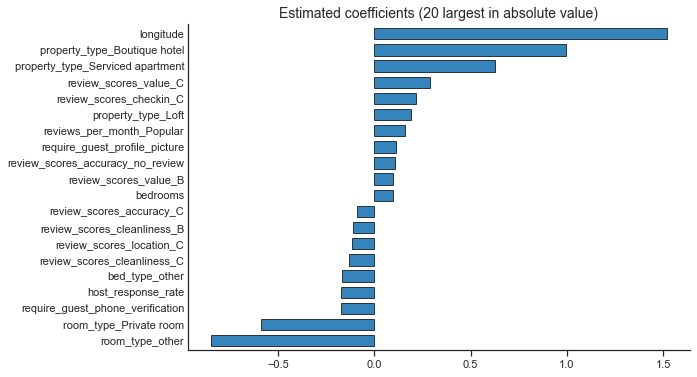

In [83]:
from statlearning import plot_coefficients
plot_coefficients(ols, X_train.columns)
plt.show()

In [84]:
y_pred_ols = pred_ols
submission = pd.DataFrame(np.c_[test.index,y_pred_ols],columns =['id','price'])
submission['id'] = submission['id'].astype('int')
submission.to_csv('kaggle_submission_ols.csv',index = False)
print(submission)

        id   price
0        0  68.946
1        1 212.200
2        2 134.904
3        3  64.921
4        4 122.466
...    ...     ...
1995  1995 324.298
1996  1996 275.751
1997  1997 168.278
1998  1998  75.166
1999  1999  61.750

[2000 rows x 2 columns]


In [85]:
# Subset selection

In [86]:
%%time
from statlearning import forward

fwd = forward()
fwd.fit(np.array(X_train), np.array(y_train))

CPU times: user 11.7 s, sys: 235 ms, total: 11.9 s
Wall time: 3.14 s


In [87]:
# Scaling predictors

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print(y_pred[0]) # we will get the result below

4.23372441806055


In [90]:
from sklearn.pipeline import Pipeline

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Ridge()),
])

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(y_pred[0]) 

4.23372441806055


In [91]:
# Ridge

In [92]:
from sklearn.linear_model import RidgeCV
warnings.filterwarnings("ignore", category=DeprecationWarning) # This line of code ignores a deprecation warning

alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
        cv=5)

In [93]:
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore", category=DeprecationWarning) # This line of code ignores a deprecation warning

alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
])

ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3...
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
                         cv=5))])

In [94]:
pred_ridge = np.exp(ridge.predict(X_test_scaled))
print(pred_ridge.shape)
pred_ridge.tolist()

(2000,)


[4.4713896754741235e-96,
 5.2716709991193915e-96,
 4.962657711616663e-96,
 5.1554634207034e-97,
 6.618893248159511e-97,
 6.8493635350529e-98,
 3.811150928604022e-98,
 6.529857352791999e-97,
 1.247911811491785e-97,
 1.1554112668099981e-95,
 3.6189188002250997e-96,
 1.406646881153941e-96,
 5.588636090712059e-96,
 1.757059937232981e-95,
 4.926870882644249e-96,
 1.0670591990301077e-94,
 8.790967849537894e-97,
 3.515817700854587e-95,
 8.851333556082339e-97,
 1.401042560704215e-95,
 6.066976657793777e-95,
 2.4526429739889157e-95,
 1.7717656566419855e-95,
 5.978272640042115e-97,
 3.630666379028291e-95,
 8.949224544857752e-96,
 1.0046813734159392e-96,
 6.079093304019384e-96,
 1.5568032124320537e-96,
 3.2807846318114046e-96,
 2.5982731916627824e-95,
 6.412997478345955e-97,
 3.817322635844393e-95,
 6.295145560447265e-97,
 4.25941963834119e-95,
 1.7612839149009047e-96,
 2.7986540934058566e-96,
 2.3028179274434028e-95,
 6.783154096466564e-98,
 4.563382971835256e-96,
 2.0542560071806595e-95,
 2.267

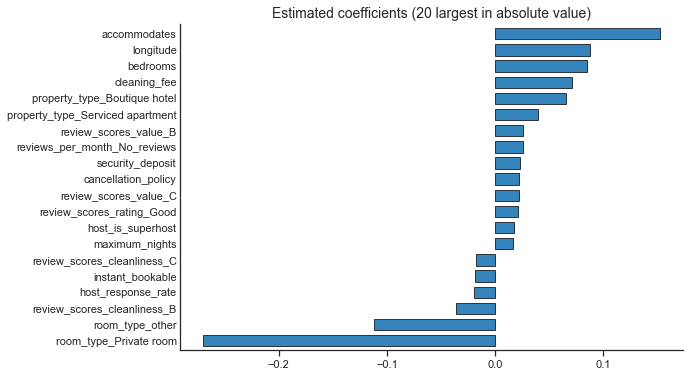

In [95]:
from statlearning import plot_coefficients
plot_coefficients(ridge._final_estimator, X_train.columns) # the final_estimator attribute refers to the pipeline
plt.show()

In [96]:
#submission code
y_pred_ridge = pred_ridge
submission_ridge = pd.DataFrame(np.c_[test.index,y_pred_ridge],columns =['id','price'])
submission_ridge['id'] = submission_ridge['id'].astype('int')
submission_ridge.to_csv('kaggle_submission_ridge.csv',index = False)
print(submission_ridge)

        id  price
0        0  0.000
1        1  0.000
2        2  0.000
3        3  0.000
4        4  0.000
...    ...    ...
1995  1995  0.000
1996  1996  0.000
1997  1997  0.000
1998  1998  0.000
1999  1999  0.000

[2000 rows x 2 columns]


In [97]:
# Lasso

In [98]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [99]:
lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5)),
])

lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('estimator', LassoCV(cv=5))])

In [100]:
reg = lasso._final_estimator # the final estimator attribute refers to the pipeline
np.sum(reg.coef_==0.0)

25

In [101]:
#predict
pred_lasso = np.exp(lasso.predict(X_test_scaled))
print(pred_lasso.shape)
pred_lasso

(2000,)


array([1.05091694e-95, 9.07445151e-96, 1.27055499e-95, ...,
       9.43384015e-95, 7.20965895e-96, 1.28776765e-95])

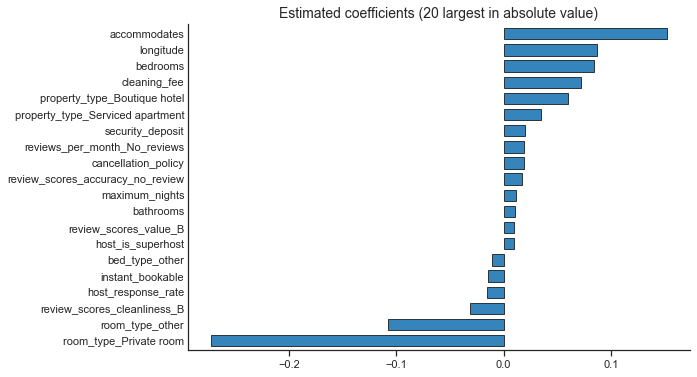

In [102]:
from statlearning import plot_coefficients

plot_coefficients(reg, X_train.columns)
plt.show()

In [103]:
#submission code
y_pred_lasso = pred_lasso
submission_lasso = pd.DataFrame(np.c_[test.index,y_pred_lasso],columns =['id','price'])
submission_lasso['id'] = submission_lasso['id'].astype('int')
submission_lasso.to_csv('kaggle_submission_lasso.csv',index = False)
print(submission_lasso)

        id  price
0        0  0.000
1        1  0.000
2        2  0.000
3        3  0.000
4        4  0.000
...    ...    ...
1995  1995  0.000
1996  1996  0.000
1997  1997  0.000
1998  1998  0.000
1999  1999  0.000

[2000 rows x 2 columns]


In [104]:
# Elastic Net

In [105]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

In [106]:
enet.l1_ratio_

0.99

In [107]:
enet = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5, n_alphas=200)),
])

enet.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 ElasticNetCV(cv=5,
                              l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                        0.8, 0.9, 0.99],
                              n_alphas=200))])

In [108]:
#predict
pred_enet = np.exp(enet.predict(X_test_scaled))
print(pred_enet.shape)
pred_enet

(2000,)


array([1.00529238e-95, 8.71306764e-96, 1.21459657e-95, ...,
       9.05357431e-95, 6.91497377e-96, 1.22912988e-95])

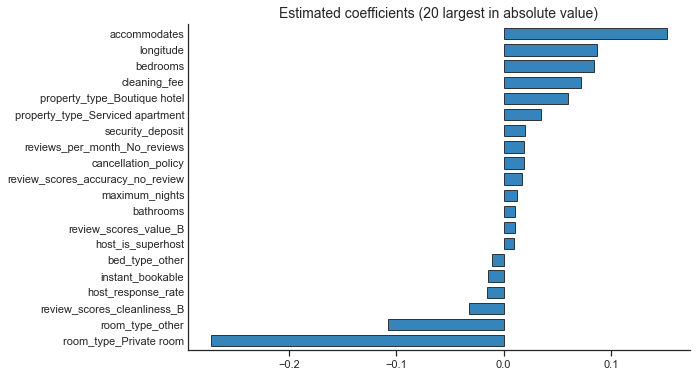

In [109]:
plot_coefficients(enet._final_estimator, X_train.columns)
plt.show()

In [110]:
#submission code
y_pred_enet = pred_enet
submission_enet = pd.DataFrame(np.c_[test.index,y_pred_enet],columns =['id','price'])
submission_enet['id'] = submission_lasso['id'].astype('int')
submission_enet.to_csv('kaggle_submission_enet.csv',index = False)
print(submission_enet)

        id  price
0        0  0.000
1        1  0.000
2        2  0.000
3        3  0.000
4        4  0.000
...    ...    ...
1995  1995  0.000
1996  1996  0.000
1997  1997  0.000
1998  1998  0.000
1999  1999  0.000

[2000 rows x 2 columns]


In [111]:
# Model evaluation

In [112]:
columns=['Test RMSE', 'Test R2']
rows=['OLS', 'Forward', 'Ridge', 'Lasso', 'Elastic Net']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[ols, fwd, ridge, lasso, enet]

for i, method in enumerate(methods):
    
    if method==fwd:
        y_pred=method.predict(np.array(X_test))
    else:
        y_pred=method.predict(X_test)
        
    results.iloc[i,0] = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
    results.iloc[i,1] = r2_score(np.exp(y_test), np.exp(y_pred))
    
results.round(3)

,Test RMSE,Test R2
OLS,135.592,-0.665
Forward,135.211,-0.655
Ridge,135.080,-0.652
Lasso,133.795,-0.621
Elastic Net,133.812,-0.621


# 4.xgBoost

In [113]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
X_train_xgb = X_train.values
X_test_xgb = X_test.values

In [ ]:
xgb_model = xgb.XGBRegressor()
learning_rate = [ 0.001, 0.01, 0.1, 0.2, 0.3] # defaul
gb = GridSearchCV(xgb_model, 
                  {'max_depth': [2,4],
                   'n_estimators': [50,100,200], 
                   'learning_rate':learning_rate}, verbose = 1)

gb_result = gb.fit(X_train_xgb, y_train)
print(gb_result.best_score_)
print(gb_result.best_params_)

In [ ]:
# Refit best parameters
gb_xgb = xgb.XGBRegressor(max_depth = 2, learning_rate = 0.1, n_estimators = 200)
gb_xgb = gb_xgb.fit(X_train_xgb, y_train)
gb_xgb

In [ ]:
gb_xgb.feature_importances_

In [ ]:
from statlearning import plot_feature_importance

xbst = gb.best_estimator_
plot_feature_importance(xbst, labels=X_train.columns)
plt.show()

In [ ]:
preds_xgb = np.exp(gb_xgb.predict(X_test_xgb))
preds_xgb

In [ ]:
%%time

dtrain = xgb.DMatrix(X_train, y_train) # we need to convert the data to the format required by xgboost
dtest  = xgb.DMatrix(X_test)

param = {
    'max_depth': 2, 
    'learning_rate': 0.1,  
     }

cv = xgb.cv(param, dtrain, num_boost_round = 1500, nfold=10, early_stopping_rounds=50, verbose_eval=False)

print(f'Selected number of boosting iterations: {cv.shape[0]}')
print(f'RMSE (CV): {cv.iloc[-1,0]:.4f}');

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(cv.iloc[:,0])
ax.set_ylabel('Cross-validation RMSE')
ax.set_xlabel('Boosting iterations')
sns.despine()
plt.show()

In [ ]:

y_pred_xgb = preds_xgb
submission_xgb = pd.DataFrame(np.c_[test.index,y_pred_xgb],columns =['id','price'])
submission_xgb['id'] = submission_xgb['id'].astype('int')
submission_xgb.to_csv('kaggle_submission_xgb.csv',  index=False)
print(submission_xgb)

# 5.Regression tree

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
predictors= train_clean.columns


x_train = train_clean
x_test = test_clean
y_train=train['price']
y_test=train['price']

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV
model = DecisionTreeRegressor(criterion='mse')

tuning_parameters = {
    'min_samples_leaf': [1,4,5,10,20,50],
    'max_depth': np.arange(1,40),
}

tree = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=10, return_train_score=False)
tree.fit(x_train, y_train)

print('Best parameters:', tree.best_params_)
tree_pred=tree.predict(x_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, tree_pred))

In [ ]:
tree_model=tree.best_estimator_
tree_model.fit(x_train, y_train)
from sklearn import tree
tree_model

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model, out_file=None, feature_names=predictors, impurity=False, rounded=True) 
print(dot_data)

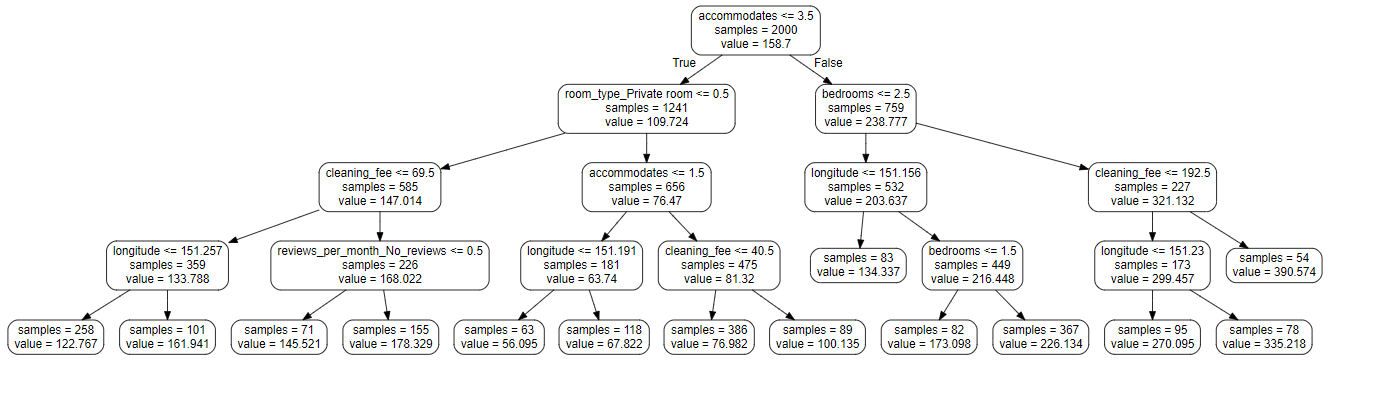

# 6.Random Forest

In [ ]:
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor(n_estimators=2000, max_features= 3, min_samples_leaf=1)
rf.fit(x_train, y_train)

rf_pred=rf.predict(x_test)
np.sqrt(mean_squared_error(y_test, rf_pred))

In [ ]:
model = RandomForestRegressor(criterion = 'mse',  n_estimators=2000)

tuning_parameters = {
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_features': np.arange(1, 30),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 16, return_train_score=False, n_jobs=-1)
rf_search.fit(x_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

In [ ]:
rf_pred=rf_search.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
rf_rmse

In [ ]:
from statlearning import plot_feature_importance
plot_feature_importance(rf,predictors)
plt.show

In [ ]:
y_pred=rf_search.predict(x_test)
submission =pd.DataFrame(np.c_[x_test.index, y_pred], columns=['Id','price'])
submission['Id']=submission['Id'].astype(int)
submission.to_csv('random_forest.csv',index=False)

## 7.Model Stacking

In [ ]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
%%time

models = [ols, lasso, ridge, enet, xbst, tree_model, rf]

stack = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv = 20)
stack.fit(X_train, y_train.ravel())

In [ ]:
from statlearning import plot_coefficients

plot_coefficients(stack.meta_regr_, labels = ['OLS', 'Lasso', 'Ridge', 'Elastic Net', 'XGBoost', 'tree_model', 'rf'])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
stack_pred=stack.predict(X_test.values)

In [ ]:
# RMSE
rmse_stack = np.sqrt(mean_squared_error(y_train, stack_pred))

In [ ]:
# R2
r2_stack = r2_score(y_train, stack_pred)

In [ ]:
y_pred = stack_pred
submission =pd.DataFrame(np.c_[X_test.index, y_pred], columns=['Id','price'])
submission['Id']=submission['Id'].astype(int)
submission.to_csv('model_stacking.csv',index=False)

## Model Evaluation

In [ ]:
columns=['Test RMSE', 'Test R2']
rows=['XGBOOST', 'regression tree', 'rf', 'stacking']
results=pd.DataFrame(0.0, columns=columns, index=rows)

results.iloc[0,0] = rmse_xgb = np.sqrt(mean_squared_error(y_test, preds_xgb))
results.iloc[0,1] = r2_xgb = r2_score(y_test, preds_xgb)
results.iloc[1,0] = rmse_tree
results.iloc[1,1] = r2_score(y_test, tree_pred)
results.iloc[2,0] = rf_rmse
results.iloc[2,1] = r2_score(y_test,rf_pred)
results.iloc[3,0] = rmse_stack
results.iloc[3,1] = r2_stack

tree_pred=tree.predict(x_test)
np.sqrt(mean_squared_error(y_test, tree_pred))

results.round(3).sort_values('Test R2')